### Know Your Culex Mosquitoes 
 

West Nile virus is spread by the Culex species of mosquito. The main vector species in the U.S. are Culex pipiens, Culex tarsalis, and Culex quinquefasciatus. These mosquitoes typically feed from evening to morning.


Culex pipiens, commonly known as the Northern House Mosquito, is found mainly in the Eastern U.S. It is a medium-sized mosquito with a brownish or grayish body and brown wings. Their larvae thrive in containers of stagnant, polluted water, and thus these mosquitoes are the primary target of the campaign to drain backyard sources of standing water as a way to reduce the incidence of WNV. In addition to WNV, Culex pipiens is a known carrier of St. Louis encephalitis, Western Equine encephalitis, and heartworm in dogs.


Culex tarsalis lives throughout the U.S., but is found mainly in the Midwest and West. It is a black mosquito distinguished by a white band on its proboscis, as well as white stripes along its middle and hind legs. Culex tarsalis is most active in the few hours after sunset.


Culex quinquefasciatus, the Southern House Mosquito, can be found in the southeastern region of the U.S. It is a medium-sized mosquito that is brown in color, and is a vector of WNV, St. Louis encephalitis, Western Equine encephalitis, and avian malaria.

In [83]:
# Need to clean up train['trap'][1][1:], maybe just renumber? Although may create issues with 
# matching with test set

# maybe do something with mosquito type column? Or get rid of it? what's the value?

In [2]:
import pandas as pd
import numpy as np

In [3]:
test = pd.read_csv('./assets/test.csv')
train = pd.read_csv('./assets/train.csv')
spray = pd.read_csv('./assets/spray.csv')
weather = pd.read_csv('./assets/weather.csv')

In [4]:
test.shape, train.shape, spray.shape, weather.shape

((116293, 11), (10506, 12), (14835, 4), (2944, 22))

In [5]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [6]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [7]:
train.columns = train.columns.str.lower()

In [8]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [9]:
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [74]:
train[['latitude','longitude','wnvpresent']].to_csv('tab.csv')

In [10]:
train['wnvpresent'].mean()

0.05244622120692937

In [11]:
for item in train:
    print (item)
    print (train[item].nunique())

date
95
address
138
species
7
block
64
street
128
trap
136
addressnumberandstreet
138
latitude
138
longitude
138
addressaccuracy
4
nummosquitos
50
wnvpresent
2


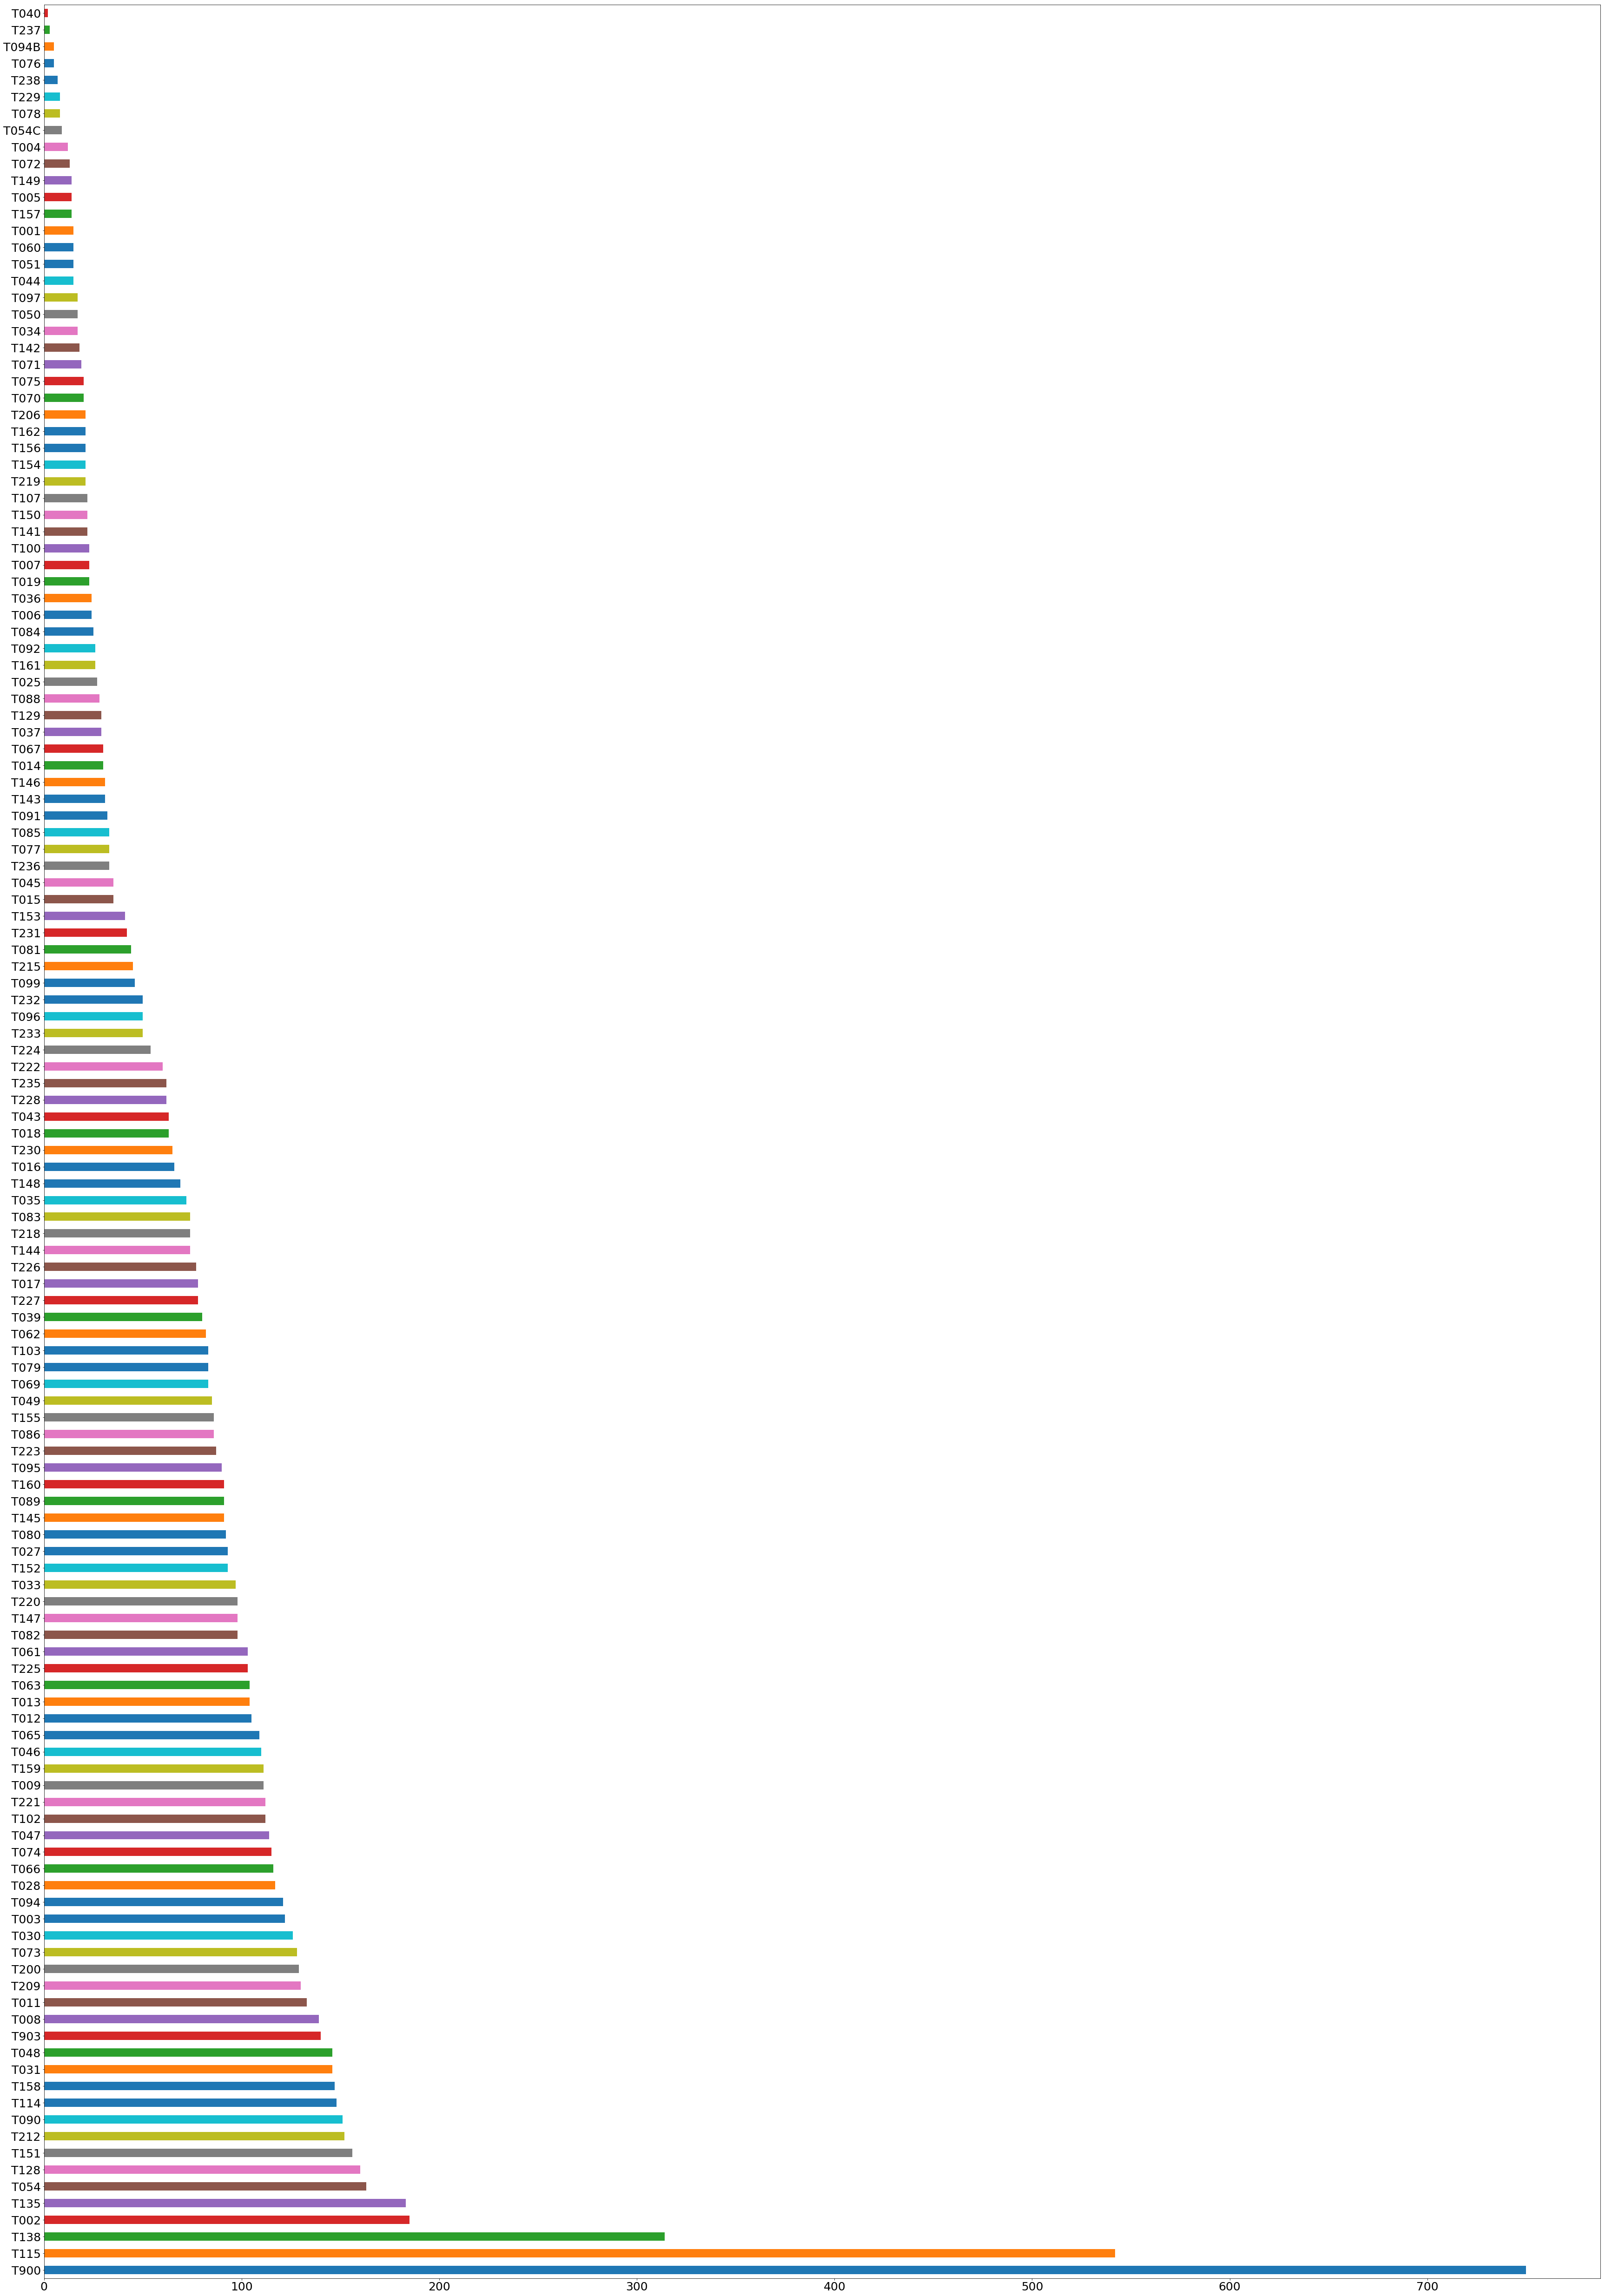

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline

train['trap'].value_counts().plot(kind='barh', figsize=(60,90), fontsize=25)

In [13]:
#DO NOT RUN TWICE

new = []
for i in train['trap']:
    new.append(i[1:])
train['trap'] = new

In [14]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

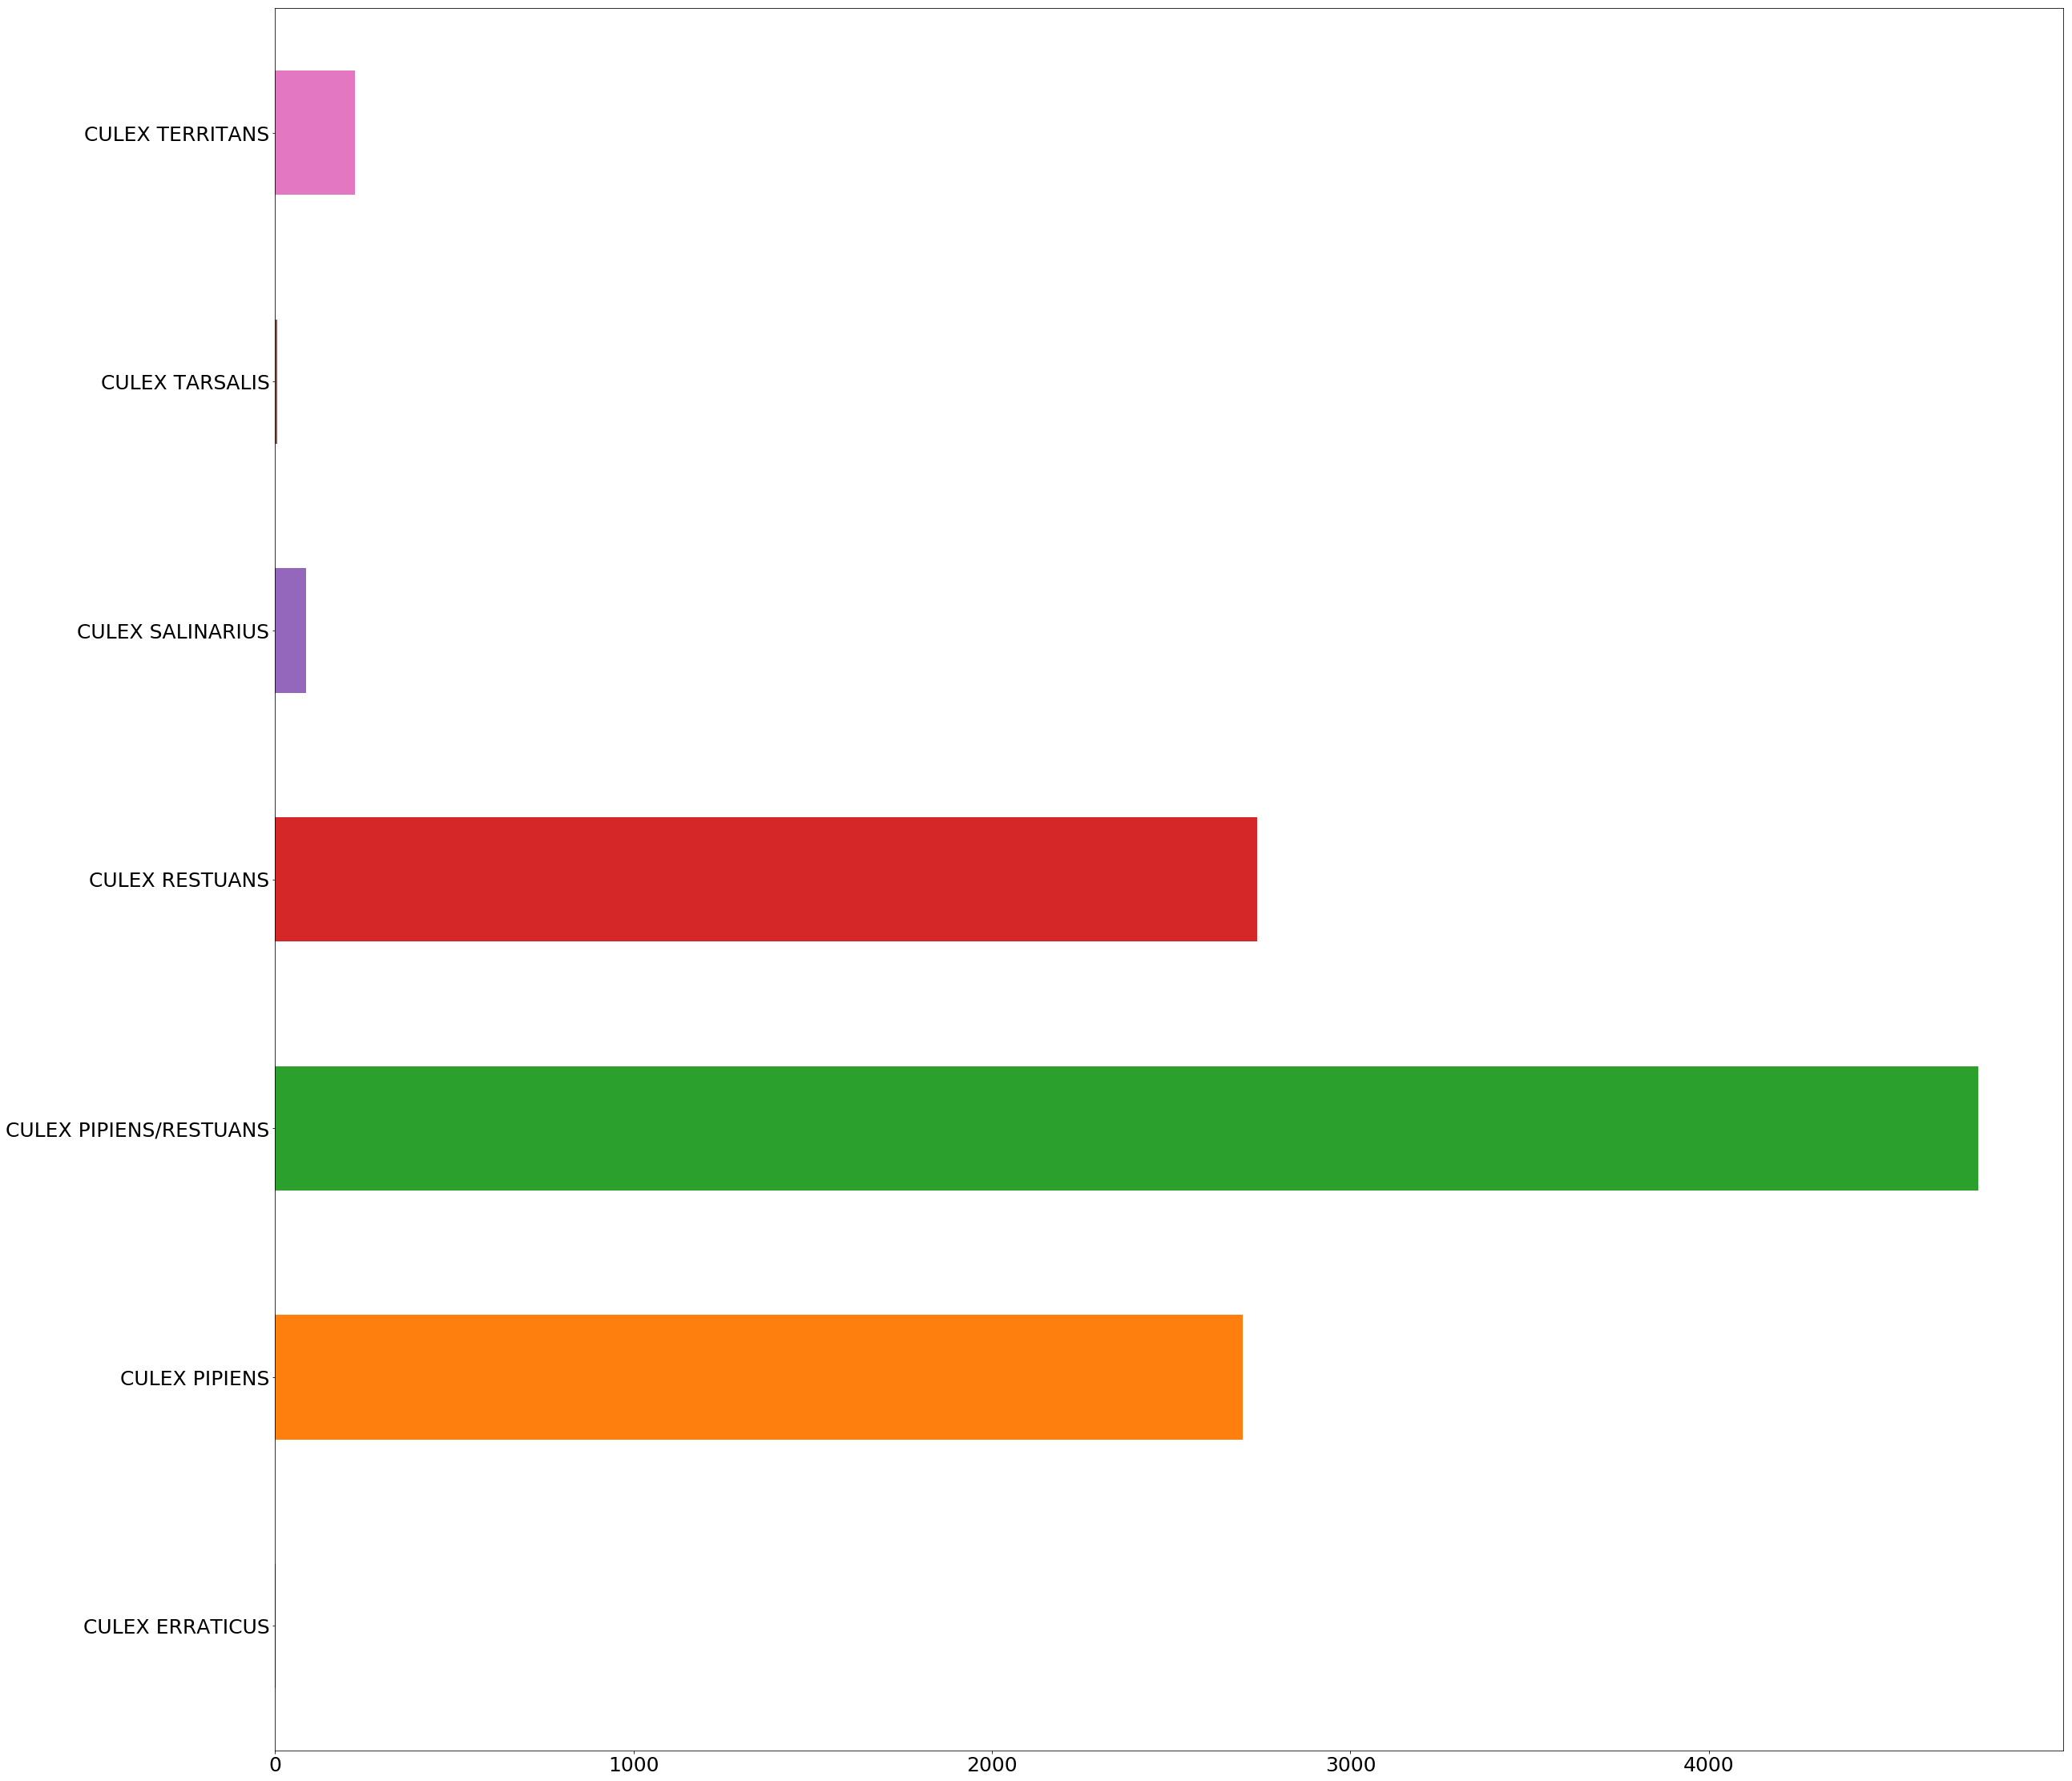

In [15]:
train.species.value_counts().sort_index().plot(kind='barh',figsize=(40,40), fontsize=25)

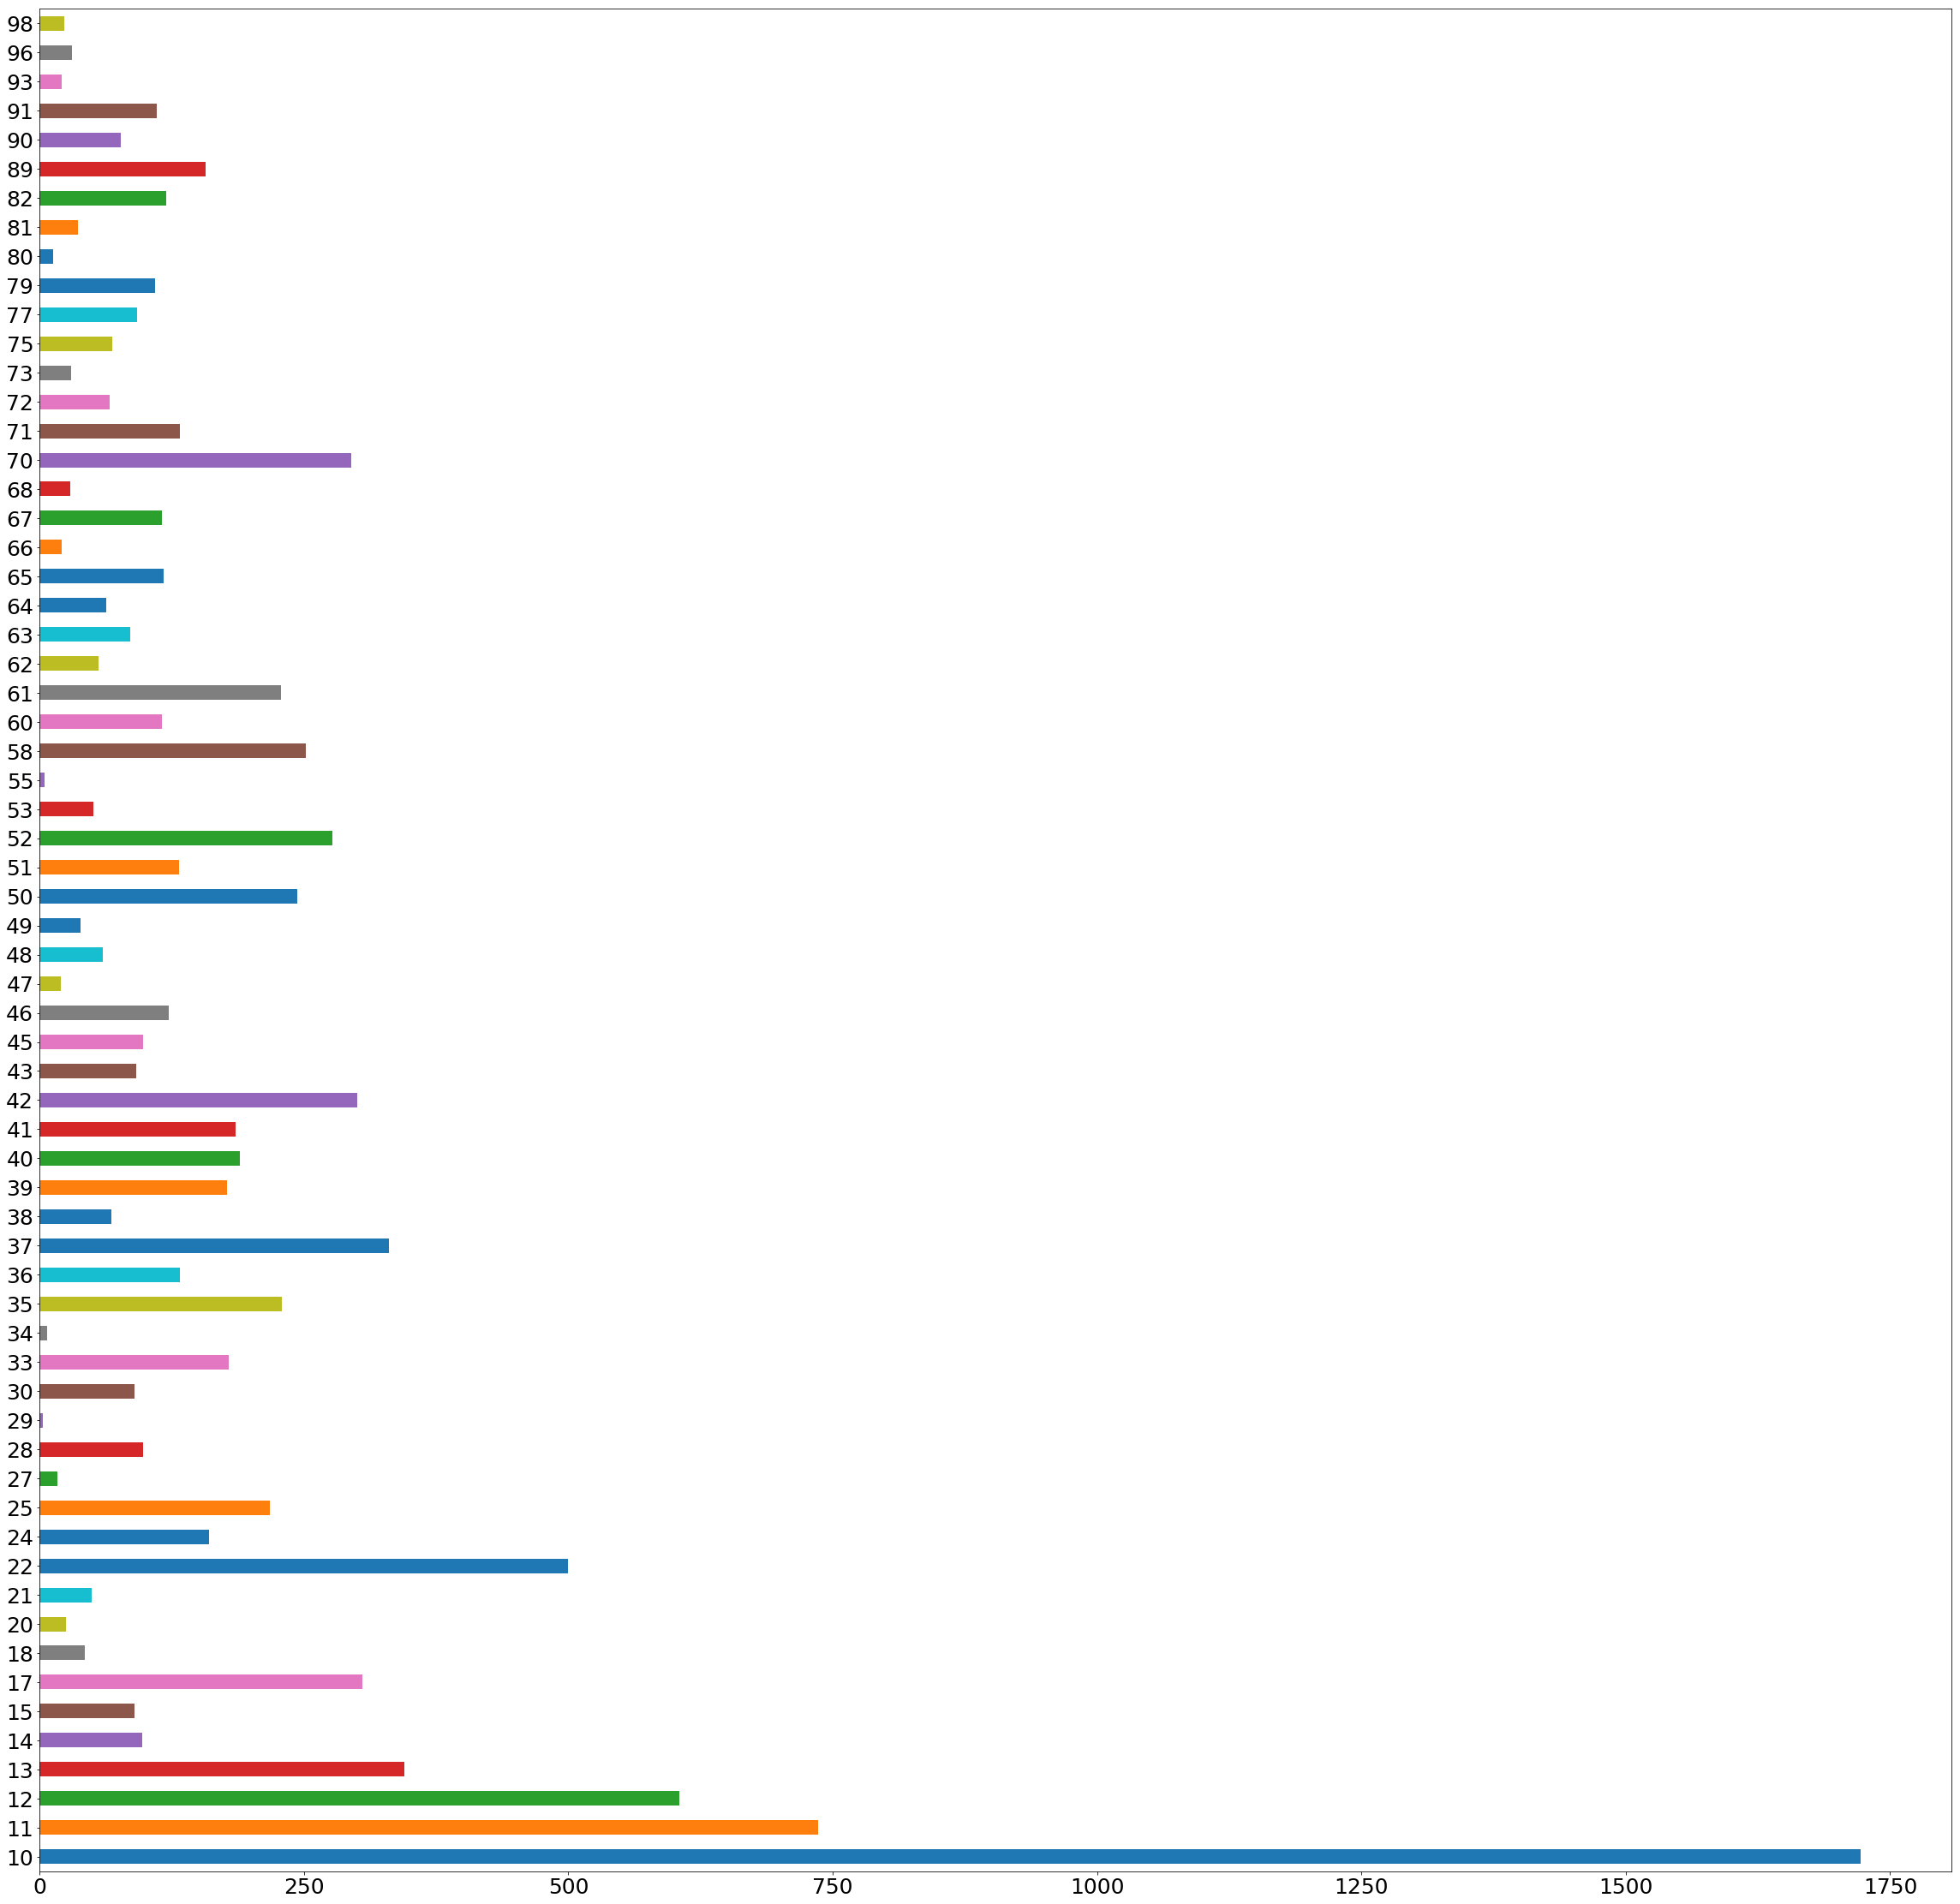

In [16]:
train.block.value_counts().sort_index().plot(kind='barh',figsize=(40,40), fontsize=25)

In [57]:
train.wnvpresent.sum()

551

In [94]:
import seaborn as sns

/Users/veraburfield/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/Users/veraburfield/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


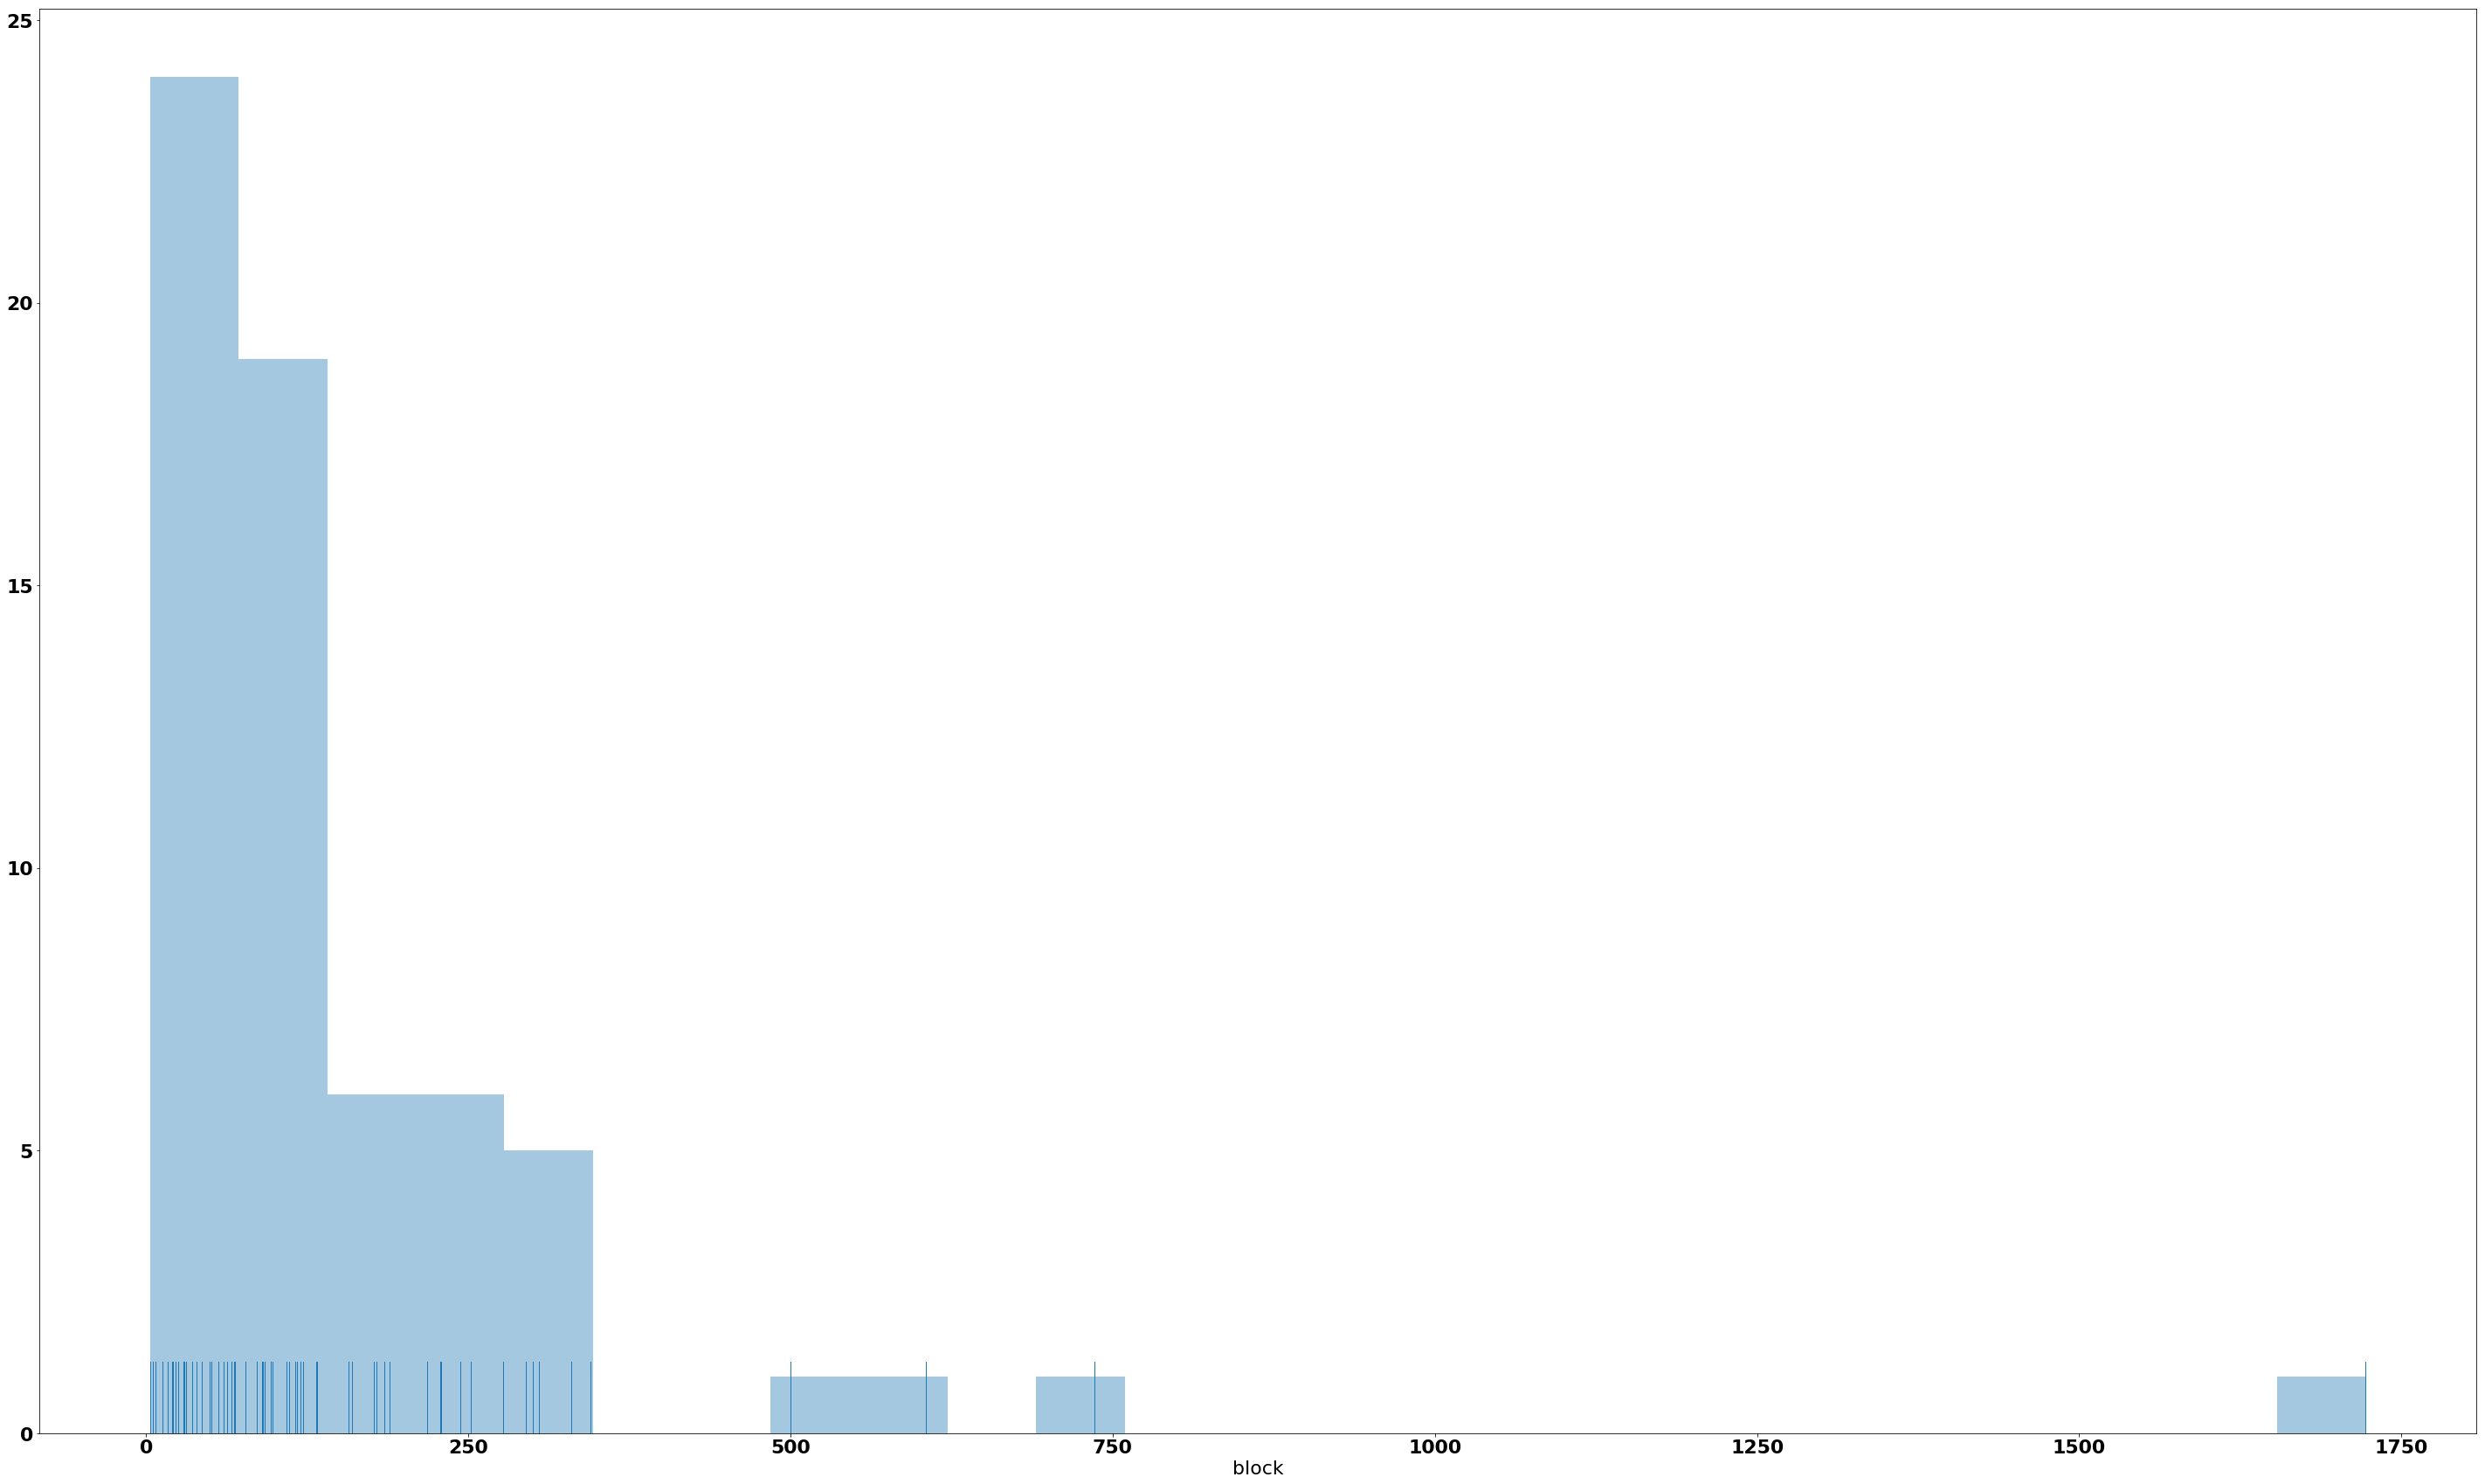

In [100]:
sns.distplot(train.block.value_counts(), kde=False, rug=True)

In [58]:
train.groupby('wnvpresent').species.value_counts()

wnvpresent  species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: species, dtype: int64

In [93]:
train.block.value_counts() #so on some blocks there are many more observations that on others

10    1722
11     736
12     605
22     500
13     345
37     330
17     305
42     300
70     295
52     277
58     252
50     244
35     229
61     228
25     218
40     189
41     185
33     179
39     177
24     160
89     157
71     133
36     133
51     132
46     122
82     120
65     117
67     116
60     116
91     111
      ... 
77      92
43      91
30      90
15      90
63      86
90      77
75      69
38      68
72      66
64      63
48      60
62      56
53      51
21      49
18      43
49      39
81      36
96      31
73      30
68      29
20      25
98      23
93      21
66      21
47      20
27      17
80      13
34       7
55       5
29       3
Name: block, Length: 64, dtype: int64

In [92]:
train.groupby('block').wnvpresent.value_counts()

block  wnvpresent
10     0             1611
       1              111
11     0              710
       1               26
12     0              564
       1               41
13     0              334
       1               11
14     0               92
       1                5
15     0               87
       1                3
17     0              294
       1               11
18     0               43
20     0               24
       1                1
21     0               46
       1                3
22     0              471
       1               29
24     0              149
       1               11
25     0              216
       1                2
27     0               17
28     0               94
       1                4
29     0                3
30     0               89
                     ... 
68     0               28
       1                1
70     0              279
       1               16
71     0              125
       1                8
72     0            

In [80]:
yes_wnw = train.query("wnvpresent=='1'")
yes_wnw.head(1)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1


In [91]:
yes_wnw.block.value_counts

<bound method IndexOpsMixin.value_counts of 553      38
603      12
611      12
618      12
660      12
661      12
777      41
778      41
784      79
812      22
842      22
902      11
917      42
919      42
970      45
986      70
1047     33
1078     52
1159     40
1166     50
1250     10
1306     11
1309     11
1310     11
1332     22
1411     10
1423     37
1476     79
1502     65
1503     65
         ..
10216    17
10223    67
10237    52
10239    12
10240    12
10241    12
10249    10
10251    58
10252    58
10264    10
10269    10
10273    51
10276    82
10295    17
10298    42
10307    22
10315    36
10322    10
10324    11
10338    61
10342    61
10346    10
10384    40
10386    10
10387    10
10388    10
10439    46
10462    63
10484    10
10501    51
Name: block, Length: 551, dtype: int64>

In [88]:
pd.crosstab(yes_wnw.block, yes_wnw.wnvpresent)

wnvpresent,1
block,
10,111
11,26
12,41
13,11
14,5
15,3
17,11
20,1
21,3


In [61]:
x = pd.crosstab(train.nummosquitos, train.wnvpresent) #relationship between number of mosquitos and freq of virus

In [62]:
x['wnv_freq'] = x[1]/x[0]

In [66]:
x #good for plotting?

wnvpresent,0,1,wnv_freq
nummosquitos,,,
1,2287,20,0.008745
2,1293,7,0.005414
3,881,15,0.017026
4,581,12,0.020654
5,470,19,0.040426
6,388,10,0.025773
7,313,13,0.041534
8,233,11,0.047210
9,220,17,0.077273


/Users/veraburfield/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


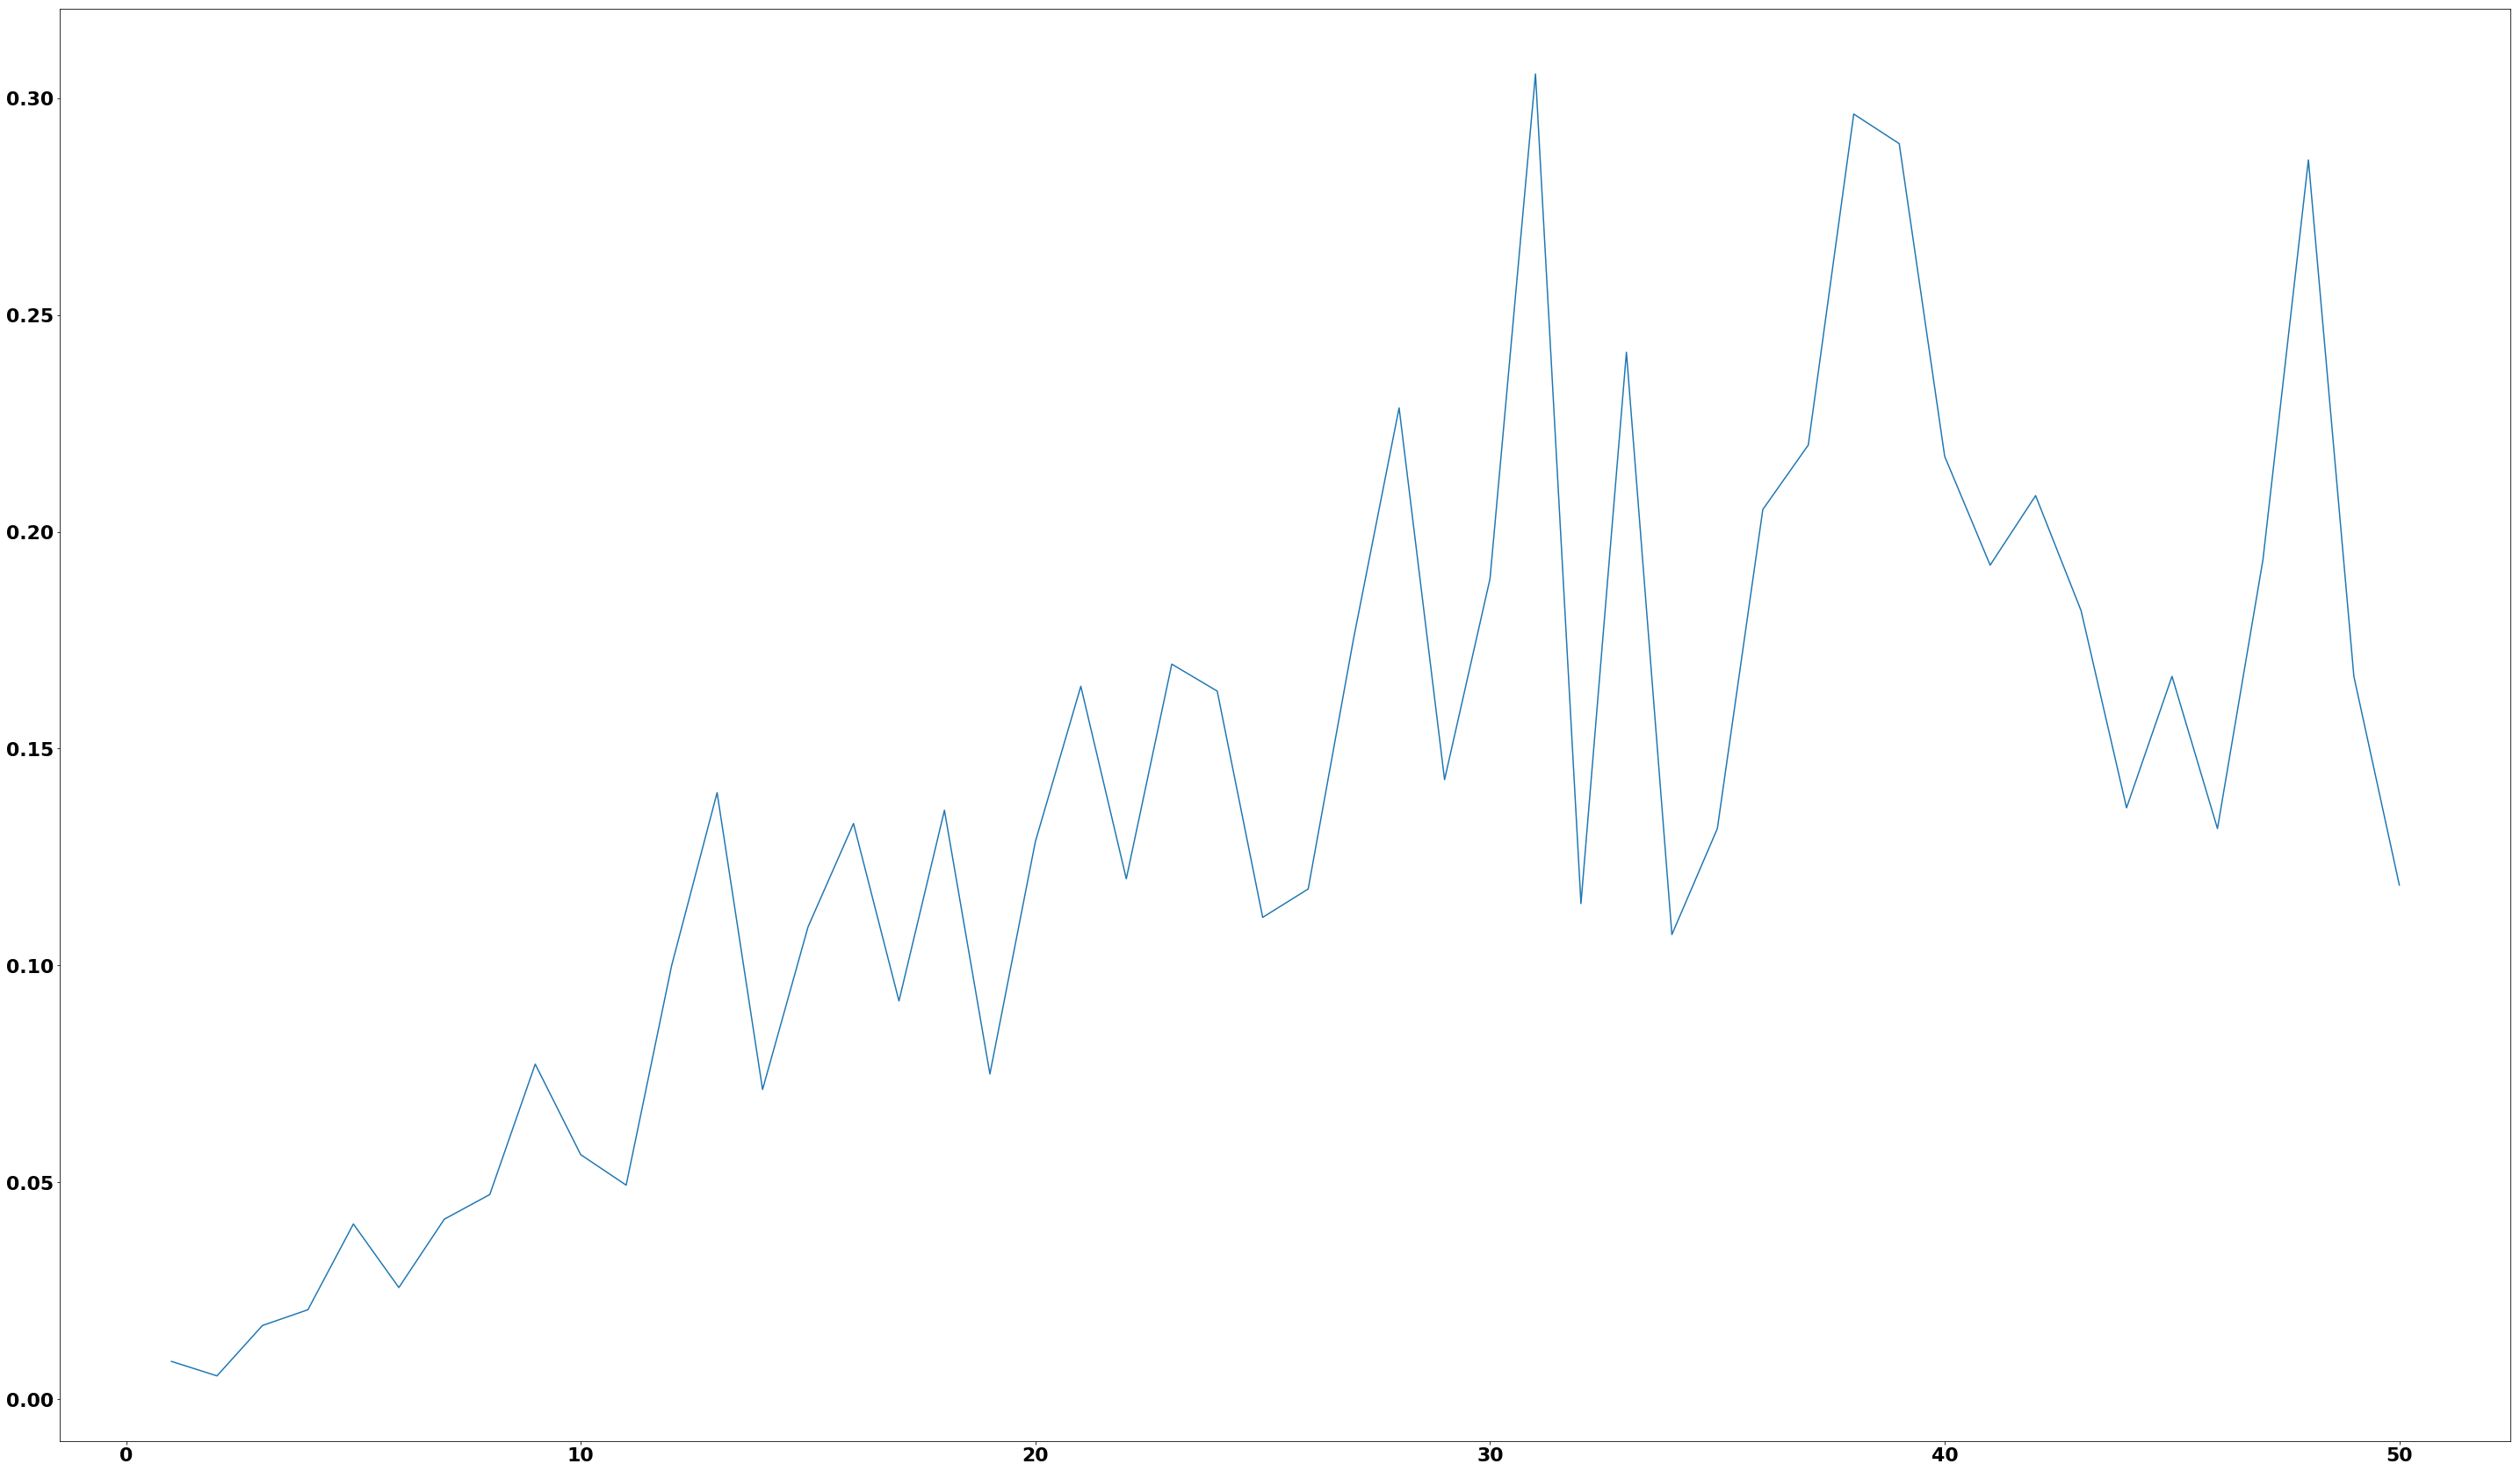

In [69]:
plt.plot(x['wnv_freq'])

In [31]:
mosquitos = pd.crosstab(train.block, train.wnvpresent)
block = pd.crosstab(train.wnvpresent, train.block)

In [43]:
train.wnvpresent.mean()

0.05244622120692937